In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# rename code
import os
import glob

# path = 'my/dataset/crawling'
# for foldername in os.listdir(path):
#     img_folder_path = path + '/' + foldername +'/'
#     cnt = 0
#     filenames = os.listdir(img_folder_path)
#     for filename in os.listdir(img_folder_path):
#         src = os.path.join(img_folder_path, filename)
#         dst = foldername + '_' + str('{0:04d}'.format(cnt)) + '.jpg'
#         dst = os.path.join(img_folder_path, dst)
#         os.rename(src, dst)
#         # img_path = img_folder_path + '/' + filename
#         # f = img_path.split('_')
#         # # renaming = img_folder_path + '/' + foldername + '_' + '{0:04d}'.format(cnt) + '.jpg'
#         # renaming = path + '/' + foldername + '/' + foldername + '_' + '{0:04d}'.format(cnt) + '.jpg'
#         # # if os.path.exists(renaming) == False:
#         # os.rename(img_path, renaming)
#         cnt += 1
# path = 'AutoCrawler-master/download/반팔티'
path = '/content/drive/MyDrive/cap/custom_dataset/short_sleeve/'
save_path = '/content/drive/MyDrive/cap/custom_dataset/short_sleeve/'
cnt = 0
# cnt = len(os.listdir(save_path))
files = glob.glob(path + '/*')
for i, f in enumerate(files):
    ftitle, fext = os.path.splitext(f)
    fname = ftitle.split('_')[0] # 파일이름
    # fname = path + '/dress'
    # 파일이름을 fname_0000.jpg 이런 식으로 변경
    filename = save_path + 'short_sleeve' + '_' + '{0:04d}'.format(cnt) + fext
    os.rename(f, filename)
    cnt += 1
    print(filename)


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
# img_gen = tf.keras.utils.image_dataset_from_directory(rescale=1./255, validation_split=0.2)

In [2]:
train_set = tf.keras.utils.image_dataset_from_directory(directory='dataset/images/',
                                        # rescale=1./255,
                                        image_size=(28,28),
                                        # image_size=(256,256),
                                        validation_split=0.2,
                                        seed=123,
                                        # class_mode='categorical',
                                        subset='training',
                                        color_mode='grayscale',
                                        batch_size=32)
valid_set = tf.keras.utils.image_dataset_from_directory(directory='dataset/images/',
                                        # rescale=1./255,
                                        image_size=(28,28),
                                        # image_size=(256,256),
                                        validation_split=0.2,
                                        seed=123,
                                        # class_mode='categorical',
                                        subset='validation',
                                        color_mode='grayscale',
                                        shuffle= False,
                                        batch_size=32)
image_data = tf.keras.utils.image_dataset_from_directory(directory='dataset/images/',
                                         image_size=(28,28))




Found 412 files belonging to 1 classes.
Using 330 files for training.
Found 412 files belonging to 1 classes.
Using 82 files for validation.
Found 412 files belonging to 1 classes.


In [3]:
label = ['fire']
idx = 0
class_label = dict()
for i in label:
  class_label[i] = idx
  idx += 1
class_label

{'fire': 0}

# 새 섹션

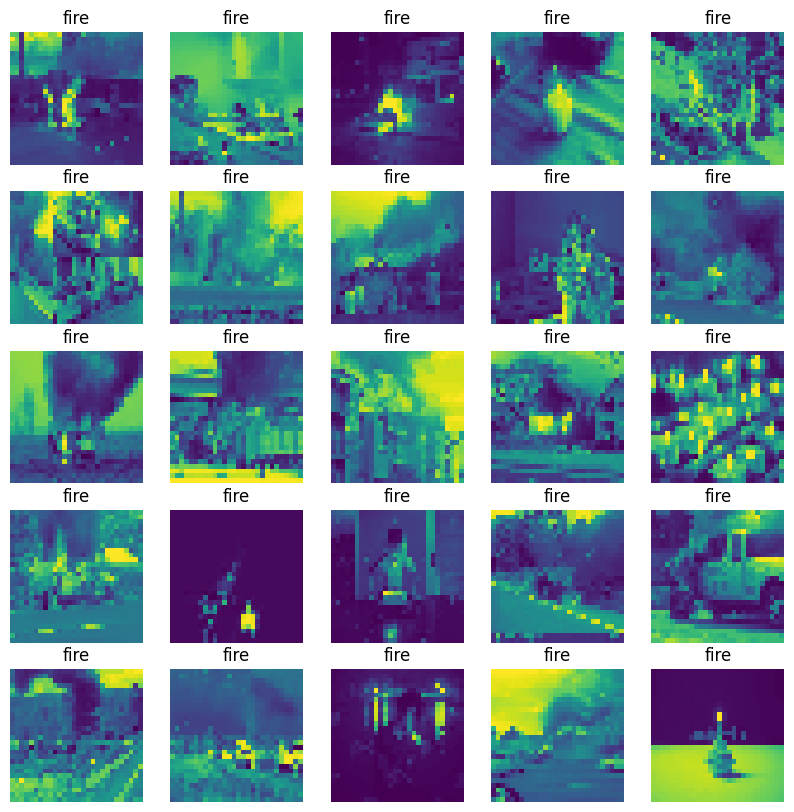

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_set.class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.fit(train_set, epochs=20, batch_size=32, validation_data=valid_set)
# model.fit(train_set_re, train_set.class_indices, epochs=10)
#, valid_set.class_indices
#, validation_data=valid_set
model.save('custom.h5')

Epoch 1/20
64/64 [==============================] - 59s 757ms/step - loss: 2.3281 - accuracy: 0.3736 - val_loss: 1.2802 - val_accuracy: 0.3814
Epoch 2/20
64/64 [==============================] - 1s 20ms/step - loss: 0.9938 - accuracy: 0.5671 - val_loss: 1.6359 - val_accuracy: 0.1581
Epoch 3/20
64/64 [==============================] - 1s 20ms/step - loss: 0.7480 - accuracy: 0.6950 - val_loss: 0.4917 - val_accuracy: 0.8083
Epoch 4/20
64/64 [==============================] - 1s 20ms/step - loss: 0.6202 - accuracy: 0.7463 - val_loss: 0.4707 - val_accuracy: 0.8656
Epoch 5/20
64/64 [==============================] - 1s 19ms/step - loss: 0.4273 - accuracy: 0.8450 - val_loss: 0.4316 - val_accuracy: 0.8360
Epoch 6/20
64/64 [==============================] - 1s 20ms/step - loss: 0.3412 - accuracy: 0.8810 - val_loss: 0.1402 - val_accuracy: 0.9743
Epoch 7/20
64/64 [==============================] - 1s 19ms/step - loss: 0.2906 - accuracy: 0.8914 - val_loss: 0.3434 - val_accuracy: 0.8617
Epoch 8/20


In [5]:
# MNIST_model = keras.models.load_model('/content/drive/MyDrive/cap/custom.h5')
MNIST_model = keras.models.load_model('train_fire.h5')

In [6]:
img = tf.keras.utils.load_img(
    'dataset/valid/fire/img (1).jpg',
    target_size=(28, 28),
    color_mode='grayscale'
)
img_array = tf.keras.utils.img_to_array(img)

image = np.expand_dims(img_array, axis=-1)
image = np.expand_dims(img_array, axis=0)

1/1 [==============================] - 0s 61ms/step
0
Predicted class: fire


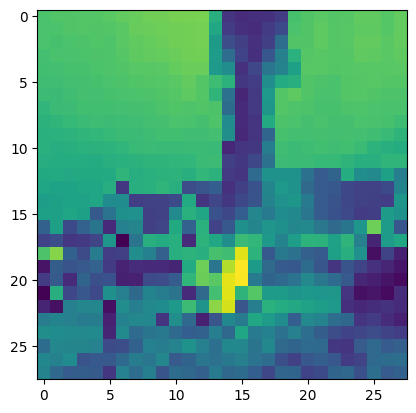

In [7]:
predictions = MNIST_model.predict(image)
score = tf.nn.softmax(predictions[0])

class_index = np.argmax(predictions[0])
class_names = ['fire']

print(class_index)
print('Predicted class:', class_names[class_index])

plt.imshow(img)
plt.show()